# Automated Customers Review Project

## Executive Summary

This business case outlines the development of an NLP model to automate the processing of customer feedback for a retail company.

The goal is to evaluate how a traditional ML solutions (NaiveBayes, SVM, RandomForest, etc) compares against a Deep Learning solution (e.g, a Transformer from HuggingFace) when trying to analyse a user review, in terms of its score (positive, negative or neutral).

## Problem Statement

The company receives thousands of text reviews every month, making it challenging to manually categorize and analyze, and visualize them. An automated system can save time, reduce costs, and provide real-time insights into customer sentiment.
Automatically classyfing a review as positive, negative or neutral is important, as often:
- Users don't leave a score, along with their review
- Different users cannot be compared (for one user, a 4 might be great, for another user a 4 means "not a 5" and it is actually bad)

## Project goals

- The ML/AI system should be able to run classification of customers' reviews (the textual content of the reviews) into positive, neutral, or negative.
- You should be able to compare which solution yeilds better results:
  - One that reads the text with a Language Model and classifies into "Positive", "Negative" or "Neutral"
  - One that transforms reviews into tabular data and classifies them using traditional Machine Learning techniques

## Data Details
The publicly available and downsized dataset of Amazon customer reviews from their online marketplace was used and can be found [here](https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/data)

In order to do this, you should transform all the scores with the following logic:
- Scores of 1,2 or 3: Negative
- Scores of 4: Neutral
- Scores of 5: Positive

<hr/>

## Part 1: Traditional NLP & ML approach

### Data Preprocessing

#### Data Cleaning

We begin by downloading the dataset from Kaggle, putting it in a dataframe, and then exploring the data

In [1]:
import kagglehub
from pathlib import Path
import os

try:
  path0
except:
  # Download latest version
  path0 = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")

print("Path to dataset files:", path0)
path = os.path.join(path0, '1429_1.csv')

print("Path to csv:", path)

100%|██████████| 16.3M/16.3M [00:01<00:00, 9.33MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datafiniti/consumer-reviews-of-amazon-products/versions/5
Path to csv: /root/.cache/kagglehub/datasets/datafiniti/consumer-reviews-of-amazon-products/versions/5/1429_1.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path, low_memory=False)
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
display(df.info())
print()

null_counts = df.isnull().sum()

# Print the null counts for each column
for column, count in null_counts.items():
    if count > 0:  # Only print columns that have nulls
        print(f"{column:<20} has {count:<7} null values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

None


name                 has 6760    null values.
asins                has 2       null values.
reviews.date         has 39      null values.
reviews.dateAdded    has 10621   null values.
reviews.didPurchase  has 34659   null values.
reviews.doRecommend  has 594     null values.
reviews.id           has 34659   null values.
reviews.numHelpful   has 529     null values.
reviews.rating       has 33      null values.
reviews.text         has 1       null values.
reviews.title        has 6       null values.
reviews.userCity     has 34660   null values.
reviews.userProvince has 34660   null values.
reviews.username     has 7       null values.


We observe that there are many columns with null values. We will begin by removing the ones that are mostly null. Then we will decide what to do with the others

In [ ]:
# remove columns with more that 30000 missing values
df = df.dropna(thresh=df.shape[0]*0.5, axis=1)
df.info()
print()
null_counts = df.isnull().sum()

# Print the null counts for each column
for column, count in null_counts.items():
    if count > 0:  # Only print columns that have nulls
        print(f"{column:<20} has {count:<7} null values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   34660 non-null  object 
 1   name                 27900 non-null  object 
 2   asins                34658 non-null  object 
 3   brand                34660 non-null  object 
 4   categories           34660 non-null  object 
 5   keys                 34660 non-null  object 
 6   manufacturer         34660 non-null  object 
 7   reviews.date         34621 non-null  object 
 8   reviews.dateAdded    24039 non-null  object 
 9   reviews.dateSeen     34660 non-null  object 
 10  reviews.doRecommend  34066 non-null  object 
 11  reviews.numHelpful   34131 non-null  float64
 12  reviews.rating       34627 non-null  float64
 13  reviews.sourceURLs   34660 non-null  object 
 14  reviews.text         34659 non-null  object 
 15  reviews.title        34654 non-null 

Since we will be dealing with the reviews, we will drop the rest of the columns and just leave the title, text, and rating. Then we will merge the title and the text, and transform the ratings to just three values: negative (1-3), neutral (4), or positive (5). Since we need the labels for at least the training, we will also remove the rows without labels (just 33 reviews).

In [3]:
# select only the columns that are useful for the analysis (title, reviews, and ratings). also drop the rows with missing ratings
reviews = df[['reviews.text', 'reviews.title', 'reviews.rating']]
reviews = reviews.dropna(subset=['reviews.rating'])
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34627 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34626 non-null  object 
 1   reviews.title   34621 non-null  object 
 2   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [4]:
#Now we merge the titles with the text of the reviews
reviews['text'] = '(' + reviews['reviews.title'] + ') ' + reviews['reviews.text']

# and map ratings to negative (1-3), neutral (4), and positive (5), they are floats...
reviews['rating'] = reviews['reviews.rating'].map({1.0: 'negative', 2.0: 'negative', 3.0: 'negative', 4.0: 'neutral', 5.0: 'positive'})

# drop the other columns
reviews = reviews[['text', 'rating']]

# and drop rows where text is missing
reviews = reviews.dropna(subset=['text'])

reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34620 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    34620 non-null  object
 1   rating  34620 non-null  object
dtypes: object(2)
memory usage: 811.4+ KB


##### Fixing text
For traditional NLP and ML models, we need to propperly clean the text. We will:
- Remove special characters, punctuation, and unnecessary whitespace from the text data.
- Convert text to lowercase to ensure consistency in word representations.

In [ ]:
import re
from bs4 import BeautifulSoup
def clean_text(text):
    # Step 1: Remove inline JavaScript/CSS
    text = re.sub(r'<(script|style).*?>.*?</\1>', '', text, flags=re.DOTALL)

    # Step 2: Remove HTML comments
    text = re.sub(r'<!--.*?-->', '', text, flags=re.DOTALL)

    # Step 3: Remove remaining HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text(separator=' ')  # Extract text and separate with spaces

    # Step 4: General regex to remove any encodings like =XX (two hexadecimal digits)
    text = re.sub(r'=[0-9A-Fa-f]{2}', ' ', text)

    # Step 5: Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove special characters and numbers
    # text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove standalone single characters
    # text = re.sub(r'\b\w\b', '', text)

    # Remove prefixed 'b'
    text = text.lstrip('b')

    # Remove any extra spaces again, just to be sure
    text = re.sub(r'\s+', ' ', text)

    # Convert to lowercase
    text = text.lower()

    return text


In [ ]:
# Apply the clean_text function and overwrite the 'text' column
review_nlp = reviews.copy()

# Does this go now, or after tokenizing?
review_nlp['text'] = review_nlp['text'].apply(clean_text)

# and see the first 5 texts
print(review_nlp.values[:5,0])

<ipython-input-7-feec2c5e0abe>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


['(kindle) this product so far has not disappointed. my children love to use it and i like the ability to monitor control what content they see with ease.'
 '(very fast) great for beginner or experienced person. bought as a gift and she loves it'
 '(beginner tablet for our 9 year old son.) inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'
 "(good!!!) i've had my fire hd 8 two weeks now and i love it. this tablet is a great value.we are prime members and that is where this tablet shines. i love being able to easily access all of the prime content as well as movies you can download and watch laterthis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. the build on this fire is insanely awesome running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like th

#### Tokenization and Lemmatization

In [ ]:
import nltk
dler = nltk.downloader.Downloader()
dler._update_index()
dler._status_cache['panlex_lite'] = 'installed' # Trick the index to treat panlex_lite as it's already installed.
dler.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords

# try:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
dler.download('punkt_tab')
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Tokenize
review_nlp['text'] = review_nlp['text'].apply(word_tokenize)
review_nlp.head()

,text,rating
0,"[(, kindle, ), this, product, so, far, has, no...",positive
1,"[(, very, fast, ), great, for, beginner, or, e...",positive
2,"[(, beginner, tablet, for, our, 9, year, old, ...",positive
3,"[(, good, !, !, !, ), i, 've, had, my, fire, h...",neutral
4,"[(, fantastic, tablet, for, kids, ), i, bought...",positive


In [ ]:
# remove punctuation
# Compile the punctuation pattern once
pattern = re.compile('[%s]' % re.escape(string.punctuation))

# Define a function to remove punctuation from tokenized sentences
def remove_punctuation_from_tokens(tokenized_sentence):
    return [pattern.sub('', token) for token in tokenized_sentence if pattern.sub('', token)]

# Apply the function to the 'text' column of the DataFrame
review_nlp['text'] = review_nlp['text'].apply(lambda sentence: remove_punctuation_from_tokens(sentence))

# Check the result
print(review_nlp.head())

                                                text    rating
0  [kindle, this, product, so, far, has, not, dis...  positive
1  [very, fast, great, for, beginner, or, experie...  positive
2  [beginner, tablet, for, our, 9, year, old, son...  positive
3  [good, i, ve, had, my, fire, hd, 8, two, weeks...   neutral
4  [fantastic, tablet, for, kids, i, bought, this...  positive


In [ ]:
# Lematize
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
dler.download('averaged_perceptron_tagger_eng')
dler.download('wordnet')

# Initialize the WordNet lemmatizer
wordnet_lemma = WordNetLemmatizer()

# Function to get word POS for lemmatization
def get_wordnet_pos(word):
    """Map POS tag to the first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0]  # Get the POS tag for the word
    tag_dict = {"J": wordnet.ADJ,  # Adjective
                "N": wordnet.NOUN,  # Noun
                "V": wordnet.VERB,  # Verb
                "R": wordnet.ADV}   # Adverb

    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN if unknown

# Function to lemmatize a tokenized sentence
def lemmatize_sentence(sentence):
    return [wordnet_lemma.lemmatize(word, get_wordnet_pos(word)) for word in sentence]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Apply the lemmatization function to the 'text' column
review_nlp['text'] = review_nlp['text'].apply(lemmatize_sentence)

# Check the result
print(review_nlp.head())

                                                text    rating
0  [kindle, this, product, so, far, have, not, di...  positive
1  [very, fast, great, for, beginner, or, experie...  positive
2  [beginner, tablet, for, our, 9, year, old, son...  positive
3  [good, i, ve, have, my, fire, hd, 8, two, week...   neutral
4  [fantastic, tablet, for, kid, i, bought, this,...  positive


#### Remove Stopwords

In [ ]:
# remove stopwords
import nltk
from nltk.corpus import stopwords

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a tokenized sentence
def remove_stopwords(sentence):
    return [word for word in sentence if word.lower() not in stop_words]

# Apply the stopword removal function to the 'text' column
review_nlp['text'] = review_nlp['text'].apply(remove_stopwords)

# Check the result
print(review_nlp.head())


                                                text    rating
0  [kindle, product, far, disappointed, child, lo...  positive
1  [fast, great, beginner, experienced, person, b...  positive
2  [beginner, tablet, 9, year, old, son, inexpens...  positive
3  [good, fire, hd, 8, two, week, love, tablet, g...   neutral
4  [fantastic, tablet, kid, bought, grand, daught...  positive


#### Vectorize

I will count the total number of words just for curiosity (and to have an idea of the argument i will pass to the ifidf

In [ ]:
# Get all tokens (assuming your 'text' column contains lists of words)
all_words = [word for sentence in review_nlp['text'] for word in sentence]

# Count unique words
unique_words = set(all_words)

# Print the number of unique words
print(f"Total unique words: {len(unique_words)}")


Total unique words: 14678


Now, we split the data before doing the IF-IDF to avoid data leakage

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(review_nlp['text'], review_nlp['rating'], test_size=0.2, random_state=42)

# Step 2: Initialize TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Join tokenized words back into strings
X_train = [' '.join(doc) for doc in X_train]
X_test = [' '.join(doc) for doc in X_test]

# Step 3: Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# Step 4: Transform the test data using the same vectorizer (without fitting again)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
print(X_train_tfidf.shape)

(27696, 5000)


### Model Building

#### Naive Bayes

In [ ]:
#naive bayes grid search
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Initialize the Naive Bayes classifier
nb = MultinomialNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best score
best_score = grid_search.best_score_
print(f"Best score: {best_score:.2f}")

# Get the best model
best_nb = grid_search.best_estimator_


Best parameters: {'alpha': 0.1}
Best score: 0.71


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the transformed training data (X_train_tfidf is a sparse matrix)
log_reg.fit(X_train_tfidf, y_train)

# Predict the labels for the train data
y_pred = log_reg.predict(X_train_tfidf)

# Evaluate the model
print("Training set:")
print(classification_report(y_train, y_pred))

# Predict the labels for the test data
y_pred = log_reg.predict(X_test_tfidf)

print("Testing set:")
print(classification_report(y_test, y_pred))


Training set:
              precision    recall  f1-score   support

    negative       0.82      0.47      0.60      1834
     neutral       0.67      0.38      0.48      6889
    positive       0.79      0.95      0.87     18973

    accuracy                           0.78     27696
   macro avg       0.76      0.60      0.65     27696
weighted avg       0.76      0.78      0.75     27696

Testing set:
              precision    recall  f1-score   support

    negative       0.70      0.38      0.49       477
     neutral       0.52      0.31      0.39      1651
    positive       0.78      0.93      0.85      4796

    accuracy                           0.74      6924
   macro avg       0.67      0.54      0.58      6924
weighted avg       0.72      0.74      0.72      6924



#### Random Forest

In [ ]:
# Random forest grid search
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {'n_estimators': [50, 100, 200, 500],
              'max_depth': [5, 10, 20]}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best score
best_score = grid_search.best_score_
print(f"Best score: {best_score:.2f}")

# Get the best model
best_rf = grid_search.best_estimator_


Best parameters: {'max_depth': 20, 'n_estimators': 50}
Best score: 0.69


In [ ]:
import pickle as pkl

# Save the best models
with open('best_nb.pkl', 'wb') as f:
    pkl.dump(best_nb, f)

with open('best_rf.pkl', 'wb') as f:
    pkl.dump(best_rf, f)

#### SVM
commented out because it took too long (1:30hr) and didnt finish. I didnt have the patience to wait longer haha

In [ ]:
# # SVM grid search
# from sklearn.svm import SVC

# # Define the parameter grid
# param_grid = {'C': [0.1, 1, 10],
#               'gamma': [1, 0.1, 0.01],
#               'kernel': ['linear', 'rbf']}
# # Initialize the SVM classifier
# svm = SVC()

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# # Fit the model on the training data
# grid_search.fit(X_train_tfidf, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print(f"Best parameters: {best_params}")

# # Get the best score
# best_score = grid_search.best_score_
# print(f"Best score: {best_score:.2f}")

# # Get the best model
# best_svm = grid_search.best_estimator_

#### XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the encoder on the target labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost classifier with default or custom parameters
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, n_jobs=-1)

# Train the XGBoost model with encoded labels
xgb.fit(X_train_tfidf, y_train_encoded)

# Predict on the test set
y_pred_encoded = xgb.predict(X_test_tfidf)

# Convert the predictions back to the original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get detailed classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.74
              precision    recall  f1-score   support

    negative       0.73      0.25      0.37       477
     neutral       0.57      0.24      0.34      1651
    positive       0.76      0.96      0.85      4796

    accuracy                           0.74      6924
   macro avg       0.69      0.48      0.52      6924
weighted avg       0.71      0.74      0.69      6924



In [ ]:
# Was going to do grid search, but couldn't
import joblib

# Save the model to disk
joblib.dump(xgb, 'xgb_model.pkl')

['xgb_model.pkl']

## Transformer Approach (HuggingFace)

Now we will use transformers from HuggingFace to see how it compares to the traditional ML models. We will use the same data, but we will use the transformer to encode the text and then we will use a simple classifier on top of it.

For BERT models, removing usefull punctuation symbols may negatively affect the performance of the model, as well as lowercasing everything. First, we will ensure that the text is as it should

In [5]:
import re
from bs4 import BeautifulSoup
def clean_text2(text):
    # Step 1: Remove inline JavaScript/CSS
    text = re.sub(r'<(script|style).*?>.*?</\1>', '', text, flags=re.DOTALL)

    # Step 2: Remove HTML comments
    text = re.sub(r'<!--.*?-->', '', text, flags=re.DOTALL)

    # Step 3: Remove remaining HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text(separator=' ')  # Extract text and separate with spaces

    # Step 4: General regex to remove any encodings like =XX (two hexadecimal digits)
    text = re.sub(r'=[0-9A-Fa-f]{2}', ' ', text)

    # Step 5: Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove prefixed 'b'
    text = text.lstrip('b')

    # Remove any extra spaces again, just to be sure
    text = re.sub(r'\s+', ' ', text)

    return text

reviews_hugging = reviews.copy()
reviews_hugging['text'] = reviews_hugging['text'].apply(clean_text2)
reviews_hugging.head(5)

<ipython-input-5-0ae28d85af6d>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,text,rating
0,(Kindle) This product so far has not disappoin...,positive
1,(very fast) great for beginner or experienced ...,positive
2,(Beginner tablet for our 9 year old son.) Inex...,positive
3,(Good!!!) I've had my Fire HD 8 two weeks now ...,neutral
4,(Fantastic Tablet for kids) I bought this for ...,positive


In [7]:
# sentiment_analysis.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
try:
  from datasets import Dataset
except:
  !pip install datasets
  from datasets import Dataset

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 w

In [18]:
le = LabelEncoder()
reviews_hugging['encoded_label'] = le.fit_transform(reviews_hugging['rating'])

# Split data
train_df, test_df = train_test_split(reviews_hugging, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Convert to HuggingFace datasets
train_ds = Dataset.from_pandas(train_df[['text', 'encoded_label']])
val_ds = Dataset.from_pandas(val_df[['text', 'encoded_label']])
test_ds = Dataset.from_pandas(test_df[['text', 'encoded_label']])

### BERT base uncased

In [19]:
# [3. Model & Tokenizer] -----------------------------------------------
model_name = "bert-base-uncased"  # For English reviews_hugging
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3,
    id2label={i: label for i, label in enumerate(le.classes_)}
)

# [4. Tokenization] ----------------------------------------------------
def tokenize_fn(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

train_ds = train_ds.map(tokenize_fn, batched=True)
val_ds = val_ds.map(tokenize_fn, batched=True)
test_ds = test_ds.map(tokenize_fn, batched=True)

# Ensure dataset has 'labels' column
train_ds = train_ds.rename_column("encoded_label", "label")
val_ds = val_ds.rename_column("encoded_label", "label")
test_ds = test_ds.rename_column("encoded_label", "label")

# Reformat datasets
train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Verify dataset format
print(train_ds[0].keys())  # Should show: input_ids, attention_mask, labels

# Set format for PyTorch
# train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "encoded_label"])
# val_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "encoded_label"])
# test_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "encoded_label"])


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/22156 [00:00<?, ? examples/s]

Map:   0%|          | 0/5540 [00:00<?, ? examples/s]

Map:   0%|          | 0/6924 [00:00<?, ? examples/s]

dict_keys(['label', 'input_ids', 'attention_mask'])


In [20]:
# [5. Training Setup] --------------------------------------------------
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1_macro": f1_score(labels, preds, average="macro")
    }

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=5,
    learning_rate=2e-5,
    per_device_train_batch_size=16,  # Reduced for stability
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    fp16=True,  # Enable mixed precision
    report_to="none"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [13]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define Google Drive folder path
drive_folder_path = '/content/drive/My Drive/Colab Notebooks/animals10 CNN Project/amazon reviews'

Mounted at /content/drive


In [22]:
# [6. Training] --------------------------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics
)


# -----------------------------------------
# Start training with crash protection
try:
    trainer.train()
except KeyboardInterrupt:
    print("\nTraining interrupted! Saving model...")
    trainer.save_model(drive_folder_path + "/interrupted_model")



Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.346000,0.750009,0.759206,0.664333
2,0.229100,0.712989,0.757401,0.646272
3,0.232000,1.091065,0.743682,0.653056
4,0.155500,1.364449,0.729422,0.654220
5,0.092300,1.509172,0.736282,0.647735



Test Set Performance:
Accuracy: 0.7679
Macro F1: 0.6767

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.58      0.67       477
     neutral       0.53      0.46      0.50      1651
    positive       0.83      0.89      0.86      4796

    accuracy                           0.77      6924
   macro avg       0.72      0.64      0.68      6924
weighted avg       0.76      0.77      0.76      6924



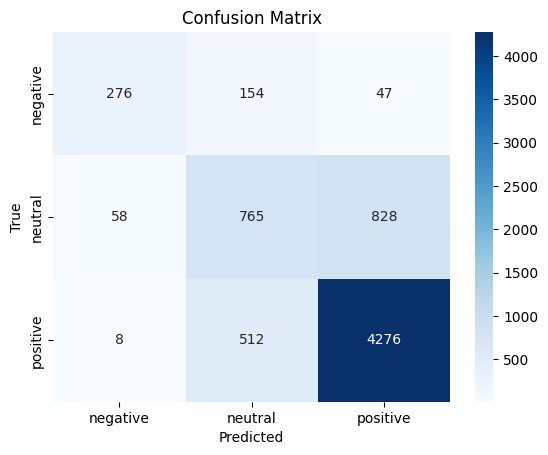

In [23]:
# Final test evaluation
test_results = trainer.evaluate(test_ds)
print("\nTest Set Performance:")
print(f"Accuracy: {test_results['eval_accuracy']:.4f}")
print(f"Macro F1: {test_results['eval_f1_macro']:.4f}")

# Generate predictions
preds = trainer.predict(test_ds)
y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)

# Detailed report
print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=le.classes_
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [26]:
# Save model and predictions
model.save_pretrained("sentiment_model")
tokenizer.save_pretrained("sentiment_model")

pd.DataFrame({
    "text": test_df["text"],
    "true_label": test_df["encoded_label"],
    "pred_label": le.inverse_transform(y_pred)
}).to_csv("predictions.csv", index=False)

# Save to Google Drive
pd.DataFrame({
    "text": test_df["text"],
    "true_label": test_df["encoded_label"],
    "pred_label": le.inverse_transform(y_pred)
}).to_csv(drive_folder_path + "/predictions.csv", index=False)

### BERT base multilingual uncased (sentiment)

In [27]:
#  [3. Model & Tokenizer] -----------------------------------------------
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"  # Example: Switch to RoBERTa 🆕
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3,
    id2label={i: label for i, label in enumerate(le.classes_)},
    ignore_mismatched_sizes=True

)

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

RuntimeError: Error(s) in loading state_dict for BertForSequenceClassification:
	size mismatch for classifier.weight: copying a param with shape torch.Size([5, 768]) from checkpoint, the shape in current model is torch.Size([3, 768]).
	size mismatch for classifier.bias: copying a param with shape torch.Size([5]) from checkpoint, the shape in current model is torch.Size([3]).
	You may consider adding `ignore_mismatched_sizes=True` in the model `from_pretrained` method.

In [ ]:
# [4. Tokenization] ----------------------------------------------------
# Must re-run tokenization with new tokenizer
def tokenize_fn(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

# Reset datasets to raw text first
train_ds = train_ds.remove_columns(["input_ids", "attention_mask", "label"])
val_ds = val_ds.remove_columns(["input_ids", "attention_mask", "label"])
test_ds = test_ds.remove_columns(["input_ids", "attention_mask", "label"])

# Re-tokenize
train_ds = train_ds.map(tokenize_fn, batched=True)
val_ds = val_ds.map(tokenize_fn, batched=True)
test_ds = test_ds.map(tokenize_fn, batched=True)

In [ ]:
# Ensure label column name
train_ds = train_ds.rename_column("encoded_label", "label")
val_ds = val_ds.rename_column("encoded_label", "label")
test_ds = test_ds.rename_column("encoded_label", "label")

# Set format
train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
# [6. Training] --------------------------------------------------------
trainer = Trainer(
    model=model,  # New model loaded here
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics
)

drive_folder_path = '/content/drive/My Drive/Colab Notebooks/animals10 CNN Project/amazon reviews/bert2-sentiment'

try:
    trainer.train()
except KeyboardInterrupt:
    print("\nTraining interrupted! Saving model...")
    trainer.save_model(drive_folder_path + "/interrupted_model")

In [ ]:
# Final test evaluation
test_results = trainer.evaluate(test_ds)
print("\nTest Set Performance:")
print(f"Accuracy: {test_results['eval_accuracy']:.4f}")
print(f"Macro F1: {test_results['eval_f1_macro']:.4f}")

# Generate predictions
preds = trainer.predict(test_ds)
y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)

# Detailed report
print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=le.classes_
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Save model and predictions
model.save_pretrained("sentiment_model")
tokenizer.save_pretrained("sentiment_model")

pd.DataFrame({
    "text": test_df["text"],
    "true_label": test_df["encoded_label"],
    "pred_label": le.inverse_transform(y_pred)
}).to_csv("predictions bert2.csv", index=False)

# Save to Google Drive
pd.DataFrame({
    "text": test_df["text"],
    "true_label": test_df["encoded_label"],
    "pred_label": le.inverse_transform(y_pred)
}).to_csv(drive_folder_path + "/predictions bert2.csv", index=False)